In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore')
df = pd.read_csv('./../data_analyse/DATA/diabetes.csv')

In [2]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
for i in range(5,0,-1):
    df = df[df.iloc[:,i] != 0]


In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,3.301020,122.627551,70.663265,29.145408,156.056122,33.086224,0.523046,30.864796,0.331633
std,3.211424,30.860781,12.496092,10.516424,118.841690,7.027659,0.345488,10.200777,0.471401
min,0.000000,56.000000,24.000000,7.000000,14.000000,18.200000,0.085000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,21.000000,76.750000,28.400000,0.269750,23.000000,0.000000
50%,2.000000,119.000000,70.000000,29.000000,125.500000,33.200000,0.449500,27.000000,0.000000
75%,5.000000,143.000000,78.000000,37.000000,190.000000,37.100000,0.687000,36.000000,1.000000
max,17.000000,198.000000,110.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
q1 = df['Insulin'].quantile(.25)
q3 = df['Insulin'].quantile(.75)
print("Intervalle interquartile : [{} ; {}] ".format(q1-1.5*(q3-q1),q3+1.5*(q3-q1)))
interval = q1-1.5*(q3-q1),q3+1.5*(q3-q1)

Intervalle interquartile : [-93.125 ; 359.875] 


In [9]:
mask = df[df['Insulin'] > interval[1]]
mask['Outcome'].value_counts()

1    15
0    10
Name: Outcome, dtype: int64

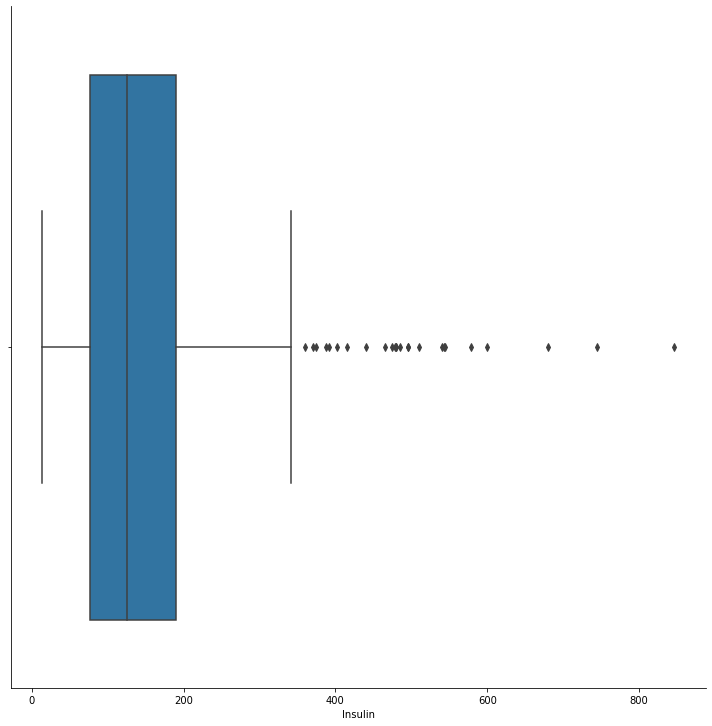

In [11]:
%matplotlib inline
sns.catplot(data=df, x='Insulin',kind='box', height = 10)

In [12]:
new_df = df[df['Insulin'] > 380 ]
new_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
8,2,197,70,45,543,30.5,0.158,53,1
13,1,189,60,23,846,30.1,0.398,59,1
111,8,155,62,26,495,34.0,0.543,46,1
153,1,153,82,42,485,40.6,0.687,23,0
186,8,181,68,36,495,30.1,0.615,60,1
220,0,177,60,29,478,34.6,1.072,21,1
228,4,197,70,39,744,36.7,2.329,31,0
247,0,165,90,33,680,52.3,0.427,23,0
248,9,124,70,33,402,35.4,0.282,34,0
286,5,155,84,44,545,38.7,0.619,34,0


In [13]:
df2 = df
df2['Insulin_aberrant'] = df2.apply(lambda row: True if row.Insulin > 359 else False, axis=1)
df2

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Insulin_aberrant
3,1,89,66,23,94,28.1,0.167,21,0,False
4,0,137,40,35,168,43.1,2.288,33,1,False
6,3,78,50,32,88,31.0,0.248,26,1,False
8,2,197,70,45,543,30.5,0.158,53,1,True
13,1,189,60,23,846,30.1,0.398,59,1,True
...,...,...,...,...,...,...,...,...,...,...
753,0,181,88,44,510,43.3,0.222,26,1,True
755,1,128,88,39,110,36.5,1.057,37,1,False
760,2,88,58,26,16,28.4,0.766,22,0,False
763,10,101,76,48,180,32.9,0.171,63,0,False


In [23]:
import scipy as scipy
from scipy import stats
l =list(df2.columns)
first = ''
last =''
test_result = [];
i = 0
while i < len(l):
    for j,e in enumerate(l):
        if j+1 >= len(l):
            break;
        statistic = stats.ttest_ind(df2[l[i]], df2[l[j+1]])
        test_result.append([l[i],e,statistic.pvalue])
        
    i = i +1
test_result

[['Pregnancies', 'Pregnancies', 0.0],
 ['Pregnancies', 'Glucose', 0.0],
 ['Pregnancies', 'BloodPressure', 1.6152588081812398e-227],
 ['Pregnancies', 'SkinThickness', 1.7053260837106893e-104],
 ['Pregnancies', 'Insulin', 0.0],
 ['Pregnancies', 'BMI', 1.5150486355681567e-55],
 ['Pregnancies', 'DiabetesPedigreeFunction', 4.406915246297507e-251],
 ['Pregnancies', 'Age', 1.700089508287018e-61],
 ['Pregnancies', 'Outcome', 1.2957068308800163e-71],
 ['Glucose', 'Pregnancies', 1.0],
 ['Glucose', 'Glucose', 1.2006169214139294e-137],
 ['Glucose', 'BloodPressure', 1.387052889778928e-279],
 ['Glucose', 'SkinThickness', 9.314347797149483e-08],
 ['Glucose', 'Insulin', 6.319059757603311e-276],
 ['Glucose', 'BMI', 0.0],
 ['Glucose', 'DiabetesPedigreeFunction', 2.2952683930405666e-275],
 ['Glucose', 'Age', 0.0],
 ['Glucose', 'Outcome', 0.0],
 ['BloodPressure', 'Pregnancies', 1.2006169214139294e-137],
 ['BloodPressure', 'Glucose', 1.0],
 ['BloodPressure', 'BloodPressure', 1.7463327204409502e-247],
 ['Bl

In [22]:
df3 = np.array(df, dtype=np.float64)
df4 = np.array(df2, dtype=np.float64)
scipy.stats.ttest_ind(df3, df4)

Ttest_indResult(statistic=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), pvalue=array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]))

In [24]:
df3 = np.array(df2, dtype=np.float64)
np.corrcoef(df3)

array([[1.        , 0.93179966, 0.98609241, ..., 0.74841148, 0.92490836,
        0.99078341],
       [0.93179966, 1.        , 0.9591213 , ..., 0.57333229, 0.93942375,
        0.94172832],
       [0.98609241, 0.9591213 , 1.        , ..., 0.71287914, 0.95181387,
        0.97661564],
       ...,
       [0.74841148, 0.57333229, 0.71287914, ..., 1.        , 0.49770371,
        0.76586429],
       [0.92490836, 0.93942375, 0.95181387, ..., 0.49770371, 1.        ,
        0.91165393],
       [0.99078341, 0.94172832, 0.97661564, ..., 0.76586429, 0.91165393,
        1.        ]])

In [29]:
corr = df2.corr()
corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Insulin_aberrant
Pregnancies,1.000000,0.198291,0.213355,0.093209,0.078984,-0.025347,0.007562,0.679608,0.256566,0.008055
Glucose,0.198291,1.000000,0.210027,0.198856,0.581223,0.209516,0.140180,0.343641,0.515703,0.336119
BloodPressure,0.213355,0.210027,1.000000,0.232571,0.098512,0.304403,-0.015971,0.300039,0.192673,0.002860
SkinThickness,0.093209,0.198856,0.232571,1.000000,0.182199,0.664355,0.160499,0.167761,0.255936,0.096780
Insulin,0.078984,0.581223,0.098512,0.182199,1.000000,0.226397,0.135906,0.217082,0.301429,0.763365
BMI,-0.025347,0.209516,0.304403,0.664355,0.226397,1.000000,0.158771,0.069814,0.270118,0.092883
DiabetesPedigreeFunction,0.007562,0.140180,-0.015971,0.160499,0.135906,0.158771,1.000000,0.085029,0.209330,0.055607
Age,0.679608,0.343641,0.300039,0.167761,0.217082,0.069814,0.085029,1.000000,0.350804,0.063924
Outcome,0.256566,0.515703,0.192673,0.255936,0.301429,0.270118,0.209330,0.350804,1.000000,0.148775
Insulin_aberrant,0.008055,0.336119,0.002860,0.096780,0.763365,0.092883,0.055607,0.063924,0.148775,1.000000


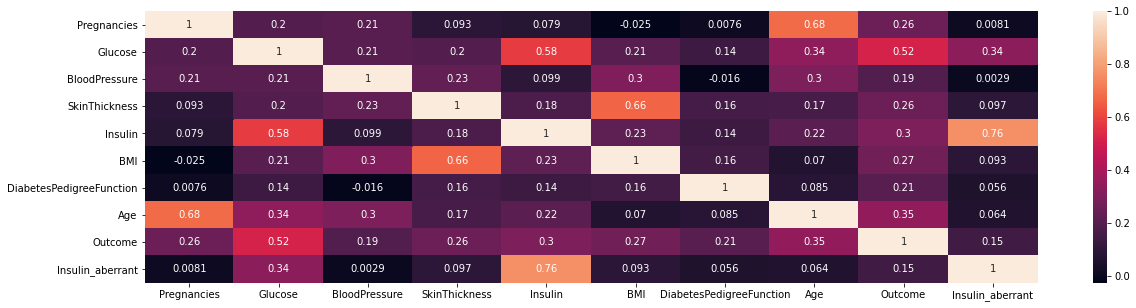

In [30]:
f, ax = plt.subplots(figsize=(20,5))
sns.heatmap(corr, annot=True, ax =ax)
plt.savefig('heatmapEX1.png')